In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [3]:
df=pd.read_csv('car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [7]:
df.shape

(8128, 12)

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [9]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [11]:
df.nunique()

name                  2058
year                    29
selling_price          677
km_driven              921
fuel                     4
seller_type              3
transmission             2
owner                    5
mileage(km/ltr/kg)     381
engine                 121
max_power              320
seats                    9
dtype: int64

In [14]:
df.year.value_counts()

year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: count, dtype: int64

Check that all values in the 'Year' column consist solely of numeric characters, without any non-numeric inputs.

In [18]:
year_int = df['year'].apply(lambda x: type(x) == int).all()
year_int

True

Renaming `selling_price` column to `price`

In [20]:
df=df.rename(columns={'selling_price': 'price'})
df.columns

Index(['name', 'year', 'price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [21]:
df.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [23]:
df.name

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8128, dtype: object

In [49]:
df.seller_type.value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [29]:
df_copy = df.copy()
df_copy.head()

,name,year,price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [35]:
df.isnull().sum()

name                    0
year                    0
price                   0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [37]:
df_copy.dtypes

name                   object
year                    int64
price                   int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

 Handle the "engine" column since it is of type "object"

In [46]:
# Extract only the numeric values from the "engine" column
df['max_power'] = df['max_power'].str.extract('(\d+)', expand=False)

# Convert the "engine" column to float
df['max_power'] = df['max_power'].astype(float)

Replacing NAN(null) values with median values

In [47]:
mis_values = ["mileage(km/ltr/kg)", "engine", "max_power","seats"]
for i in mis_values:
    df[i] = df[i].astype(float)
    df[i].fillna(df[i].median(), inplace=True)

Extracting car brand names

In [51]:
df["brand"] = df["name"].apply(lambda x: x.split()[0])

In [52]:
df.isna().sum()

name                  0
year                  0
price                 0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
brand                 0
dtype: int64

In [53]:
df.head()

,name,year,price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.0,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.0,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.0,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.0,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.0,5.0,Maruti


In [54]:
df.describe()

,year,price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.00000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.415554,1452.89813,90.957308,5.405389
std,4.044249,8.062534e+05,5.655055e+04,3.981922,498.19672,35.359432,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.00000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.00000,68.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.00000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.00000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.00000,400.000000,14.000000


In [55]:
df.to_csv('cleaned_data.csv')

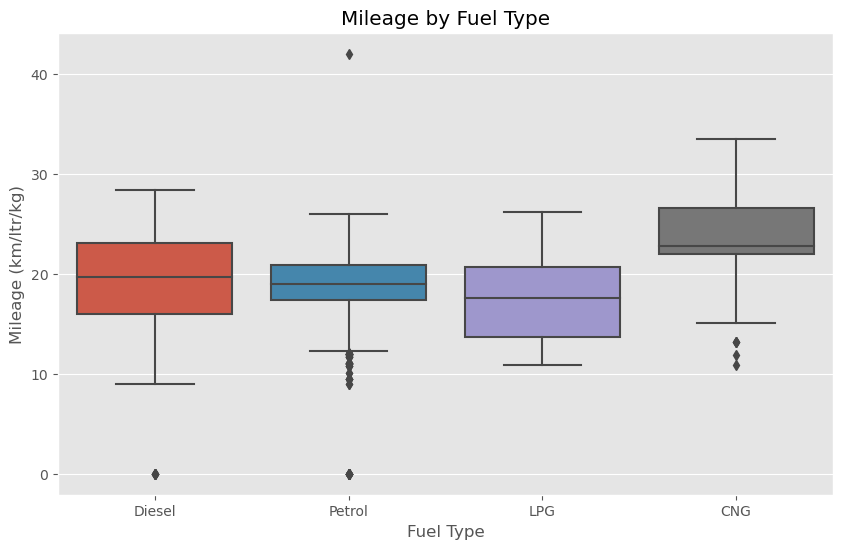

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='mileage(km/ltr/kg)', data=df)
plt.title('Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (km/ltr/kg)')
plt.show()

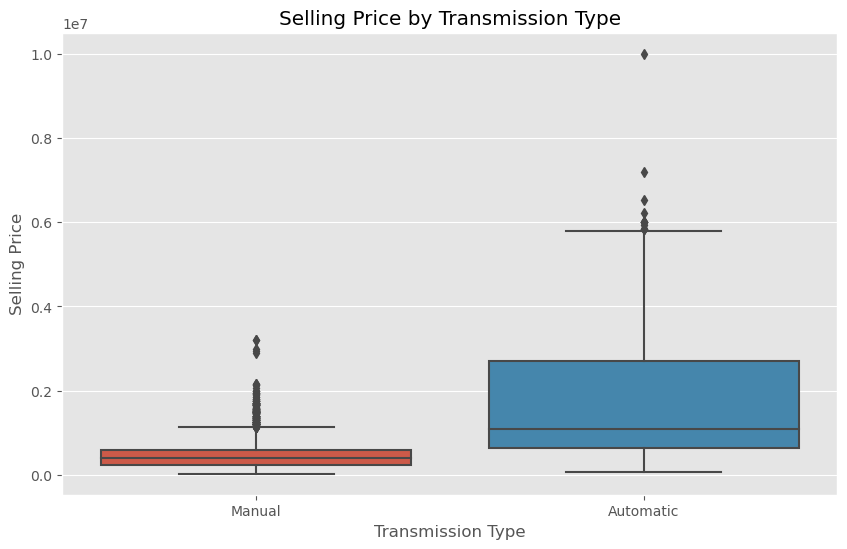

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

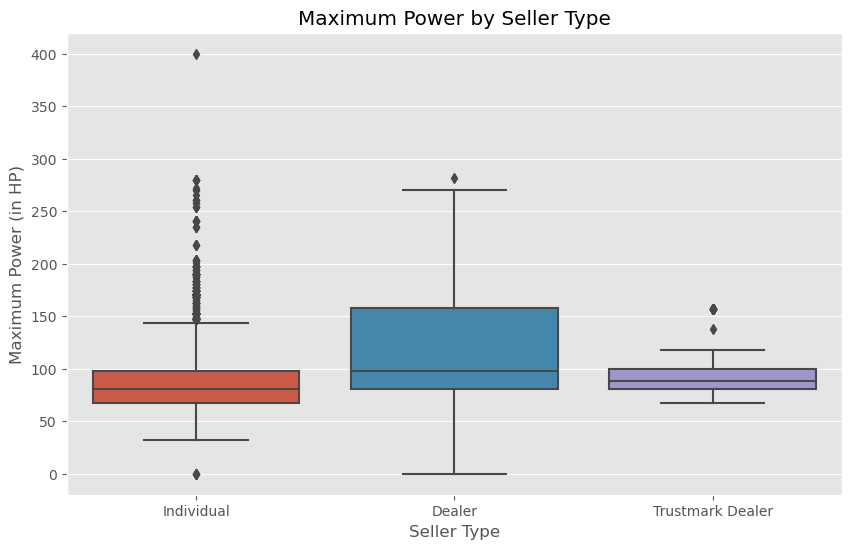

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='max_power', data=df)
plt.title('Maximum Power by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Maximum Power (in HP)')
plt.show()

Checking relationship of Year with Price

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18620\1089770896.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


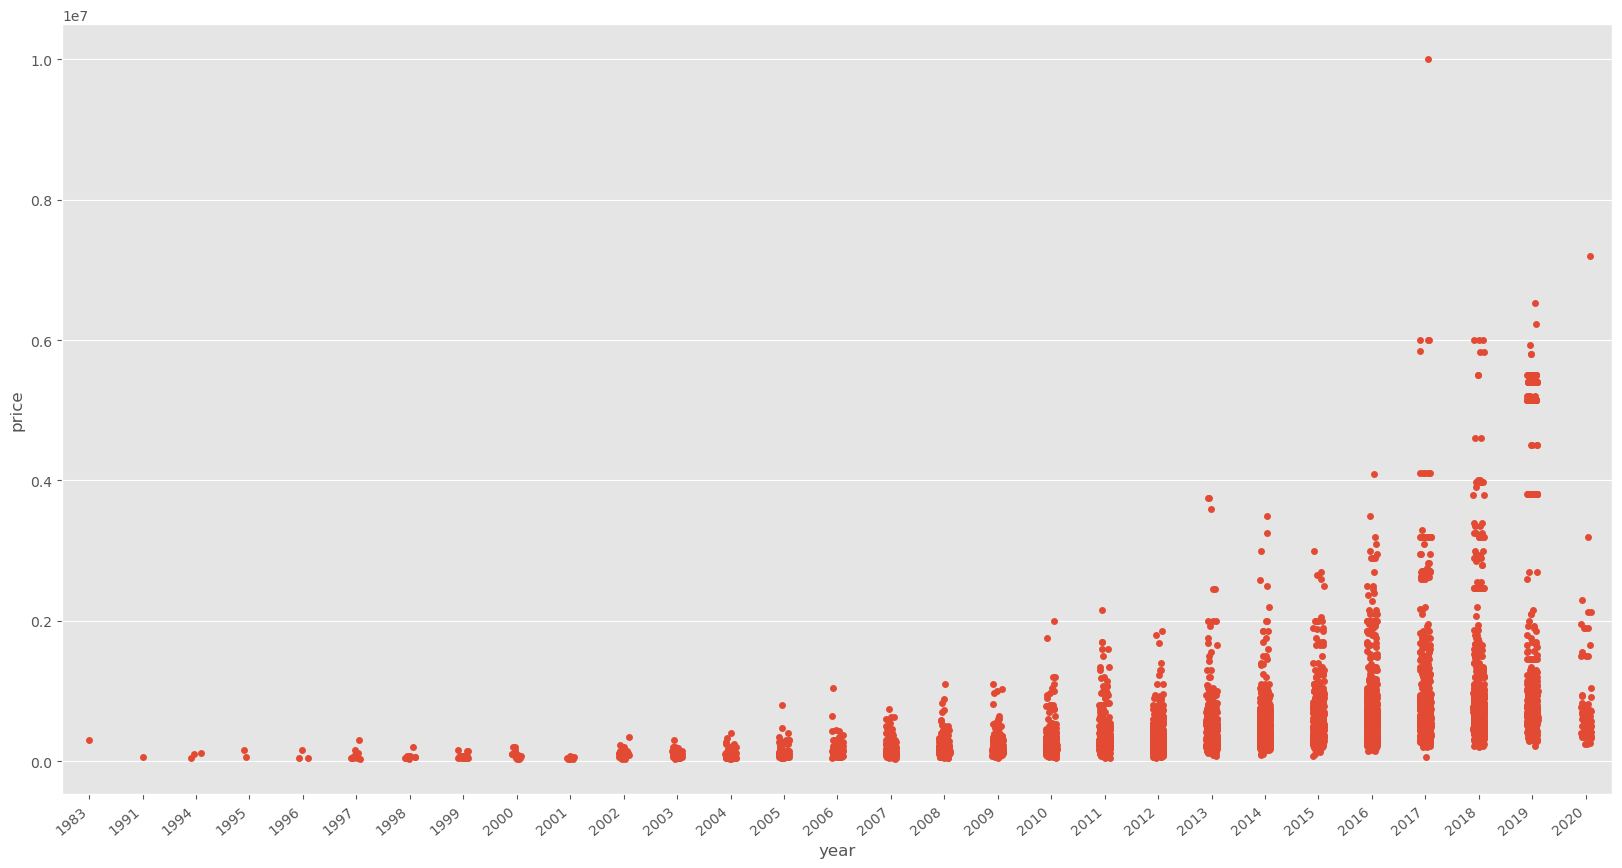

In [86]:
plt.subplots(figsize=(20, 10))
ax = sns.stripplot(x='year', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

Relationship of Price with FuelType, Year and Company mixed

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


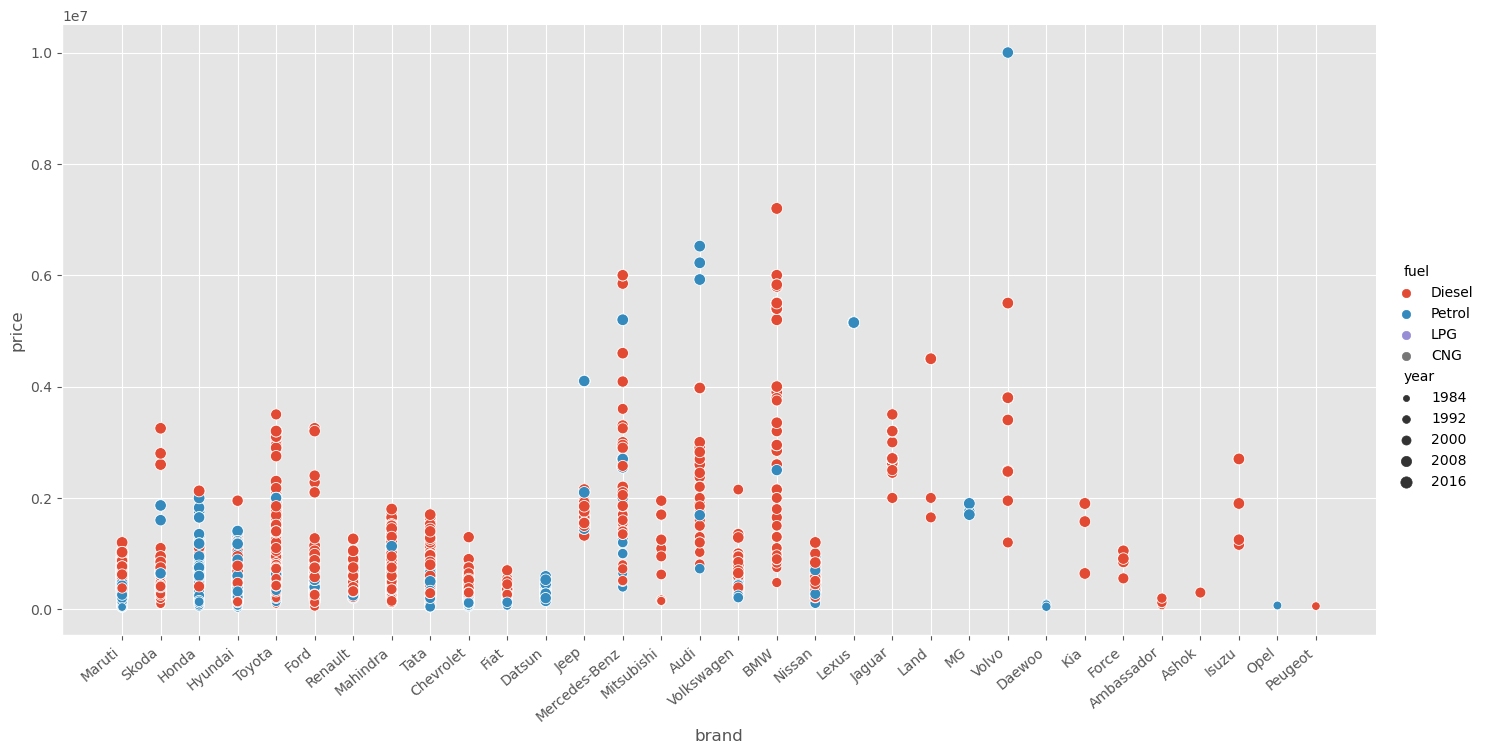

In [88]:
ax=sns.relplot(x='brand',y='price',data=df,hue='fuel',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

Create a pairplot to visualize the relationships between numeric variables

1. First, we create a list of numeric variables (`numeric`) that we want to include in the pairplot.
2. Then, we use the `sns.pairplot()` function from the Seaborn library to create a grid of scatter plots, where each variable is plotted against every other variable in the `numeric` list.
3. We set the `vars` parameter to `numeric` to specify that we want to include only the numeric variables in the pairplot.
4. Finally, we display the plot using `plt.show()`.

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


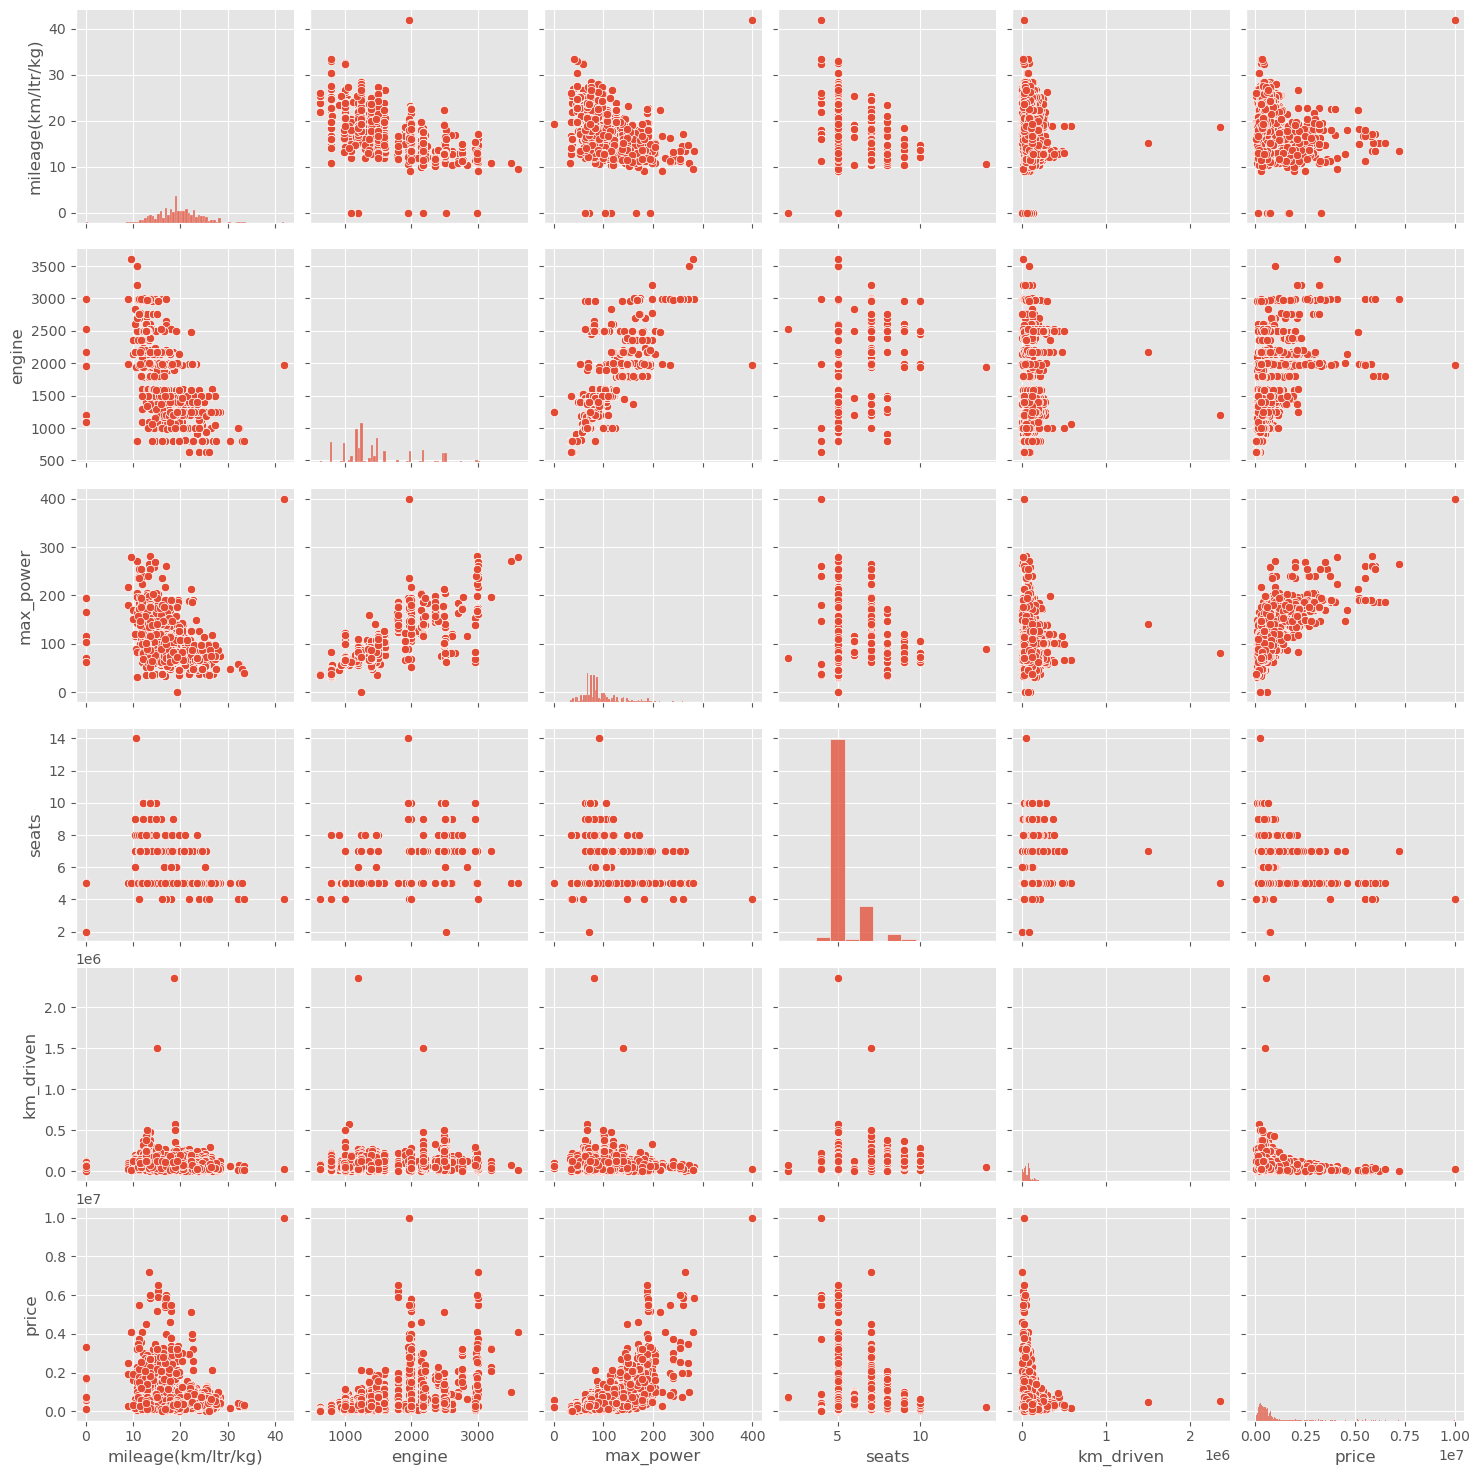

In [72]:
numeric = ["mileage(km/ltr/kg)", "engine", "max_power", "seats", "km_driven", "price"]
sns.pairplot(df, vars=numeric)
plt.show()

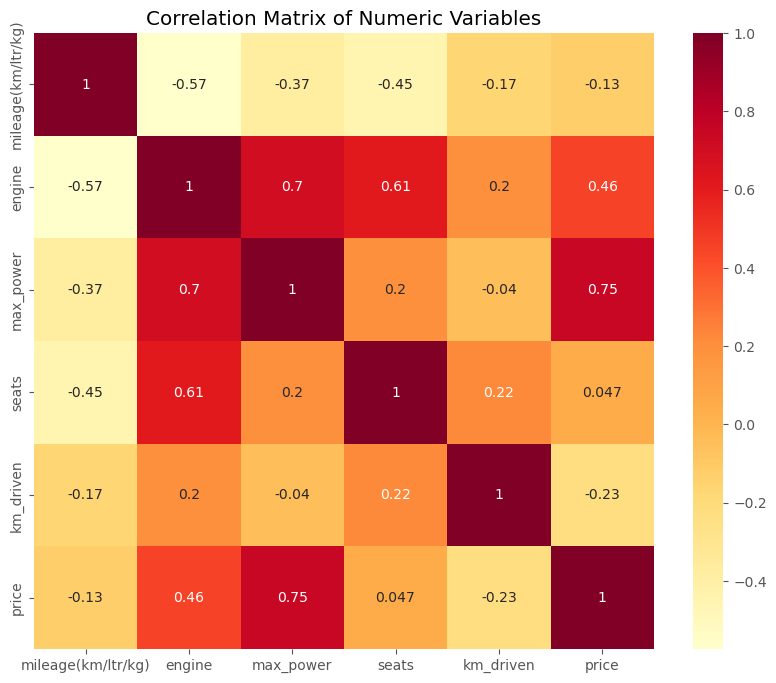

In [74]:
# Calculate the correlation matrix
corr = df[numeric].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlOrRd")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

Selecting Categorical columns and their count in dataset

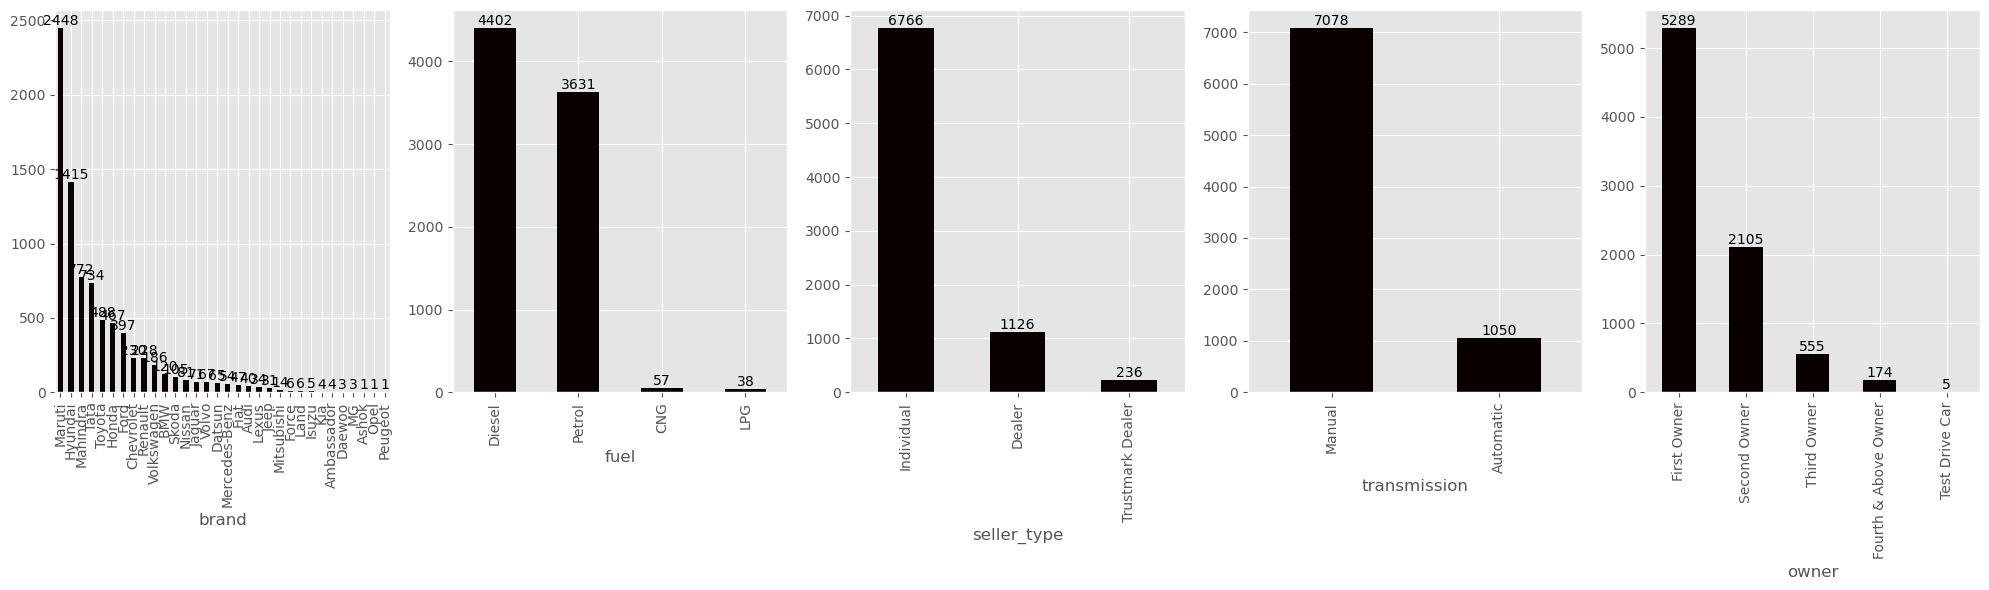

In [81]:
# Define the categorical variables
categoricals = ["brand", "fuel", "seller_type", "transmission", "owner"]

# Create a figure with 1 row and 5 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# Loop through the categorical variables and create a bar plot for each
for i, j in enumerate(categoricals):
    # Plot the value counts of the current categorical variable
    df[j].value_counts().plot(kind="bar", ax=axes[i], cmap='hot')
    
    # Add the value count labels to each bar
    for container in axes[i].containers:
        axes[i].bar_label(container)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18620\1814600842.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x=k, hue=i, ax=axes[j])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18620\1814600842.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x=k, hue=i, ax=axes[j])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18620\1814600842.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x=k, hue=i, ax=axes[j])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18620\1814600842.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x=k, hue=i, ax=axes[j])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18620\1814600842.py:8: UserWarning: Dataset has 0 v

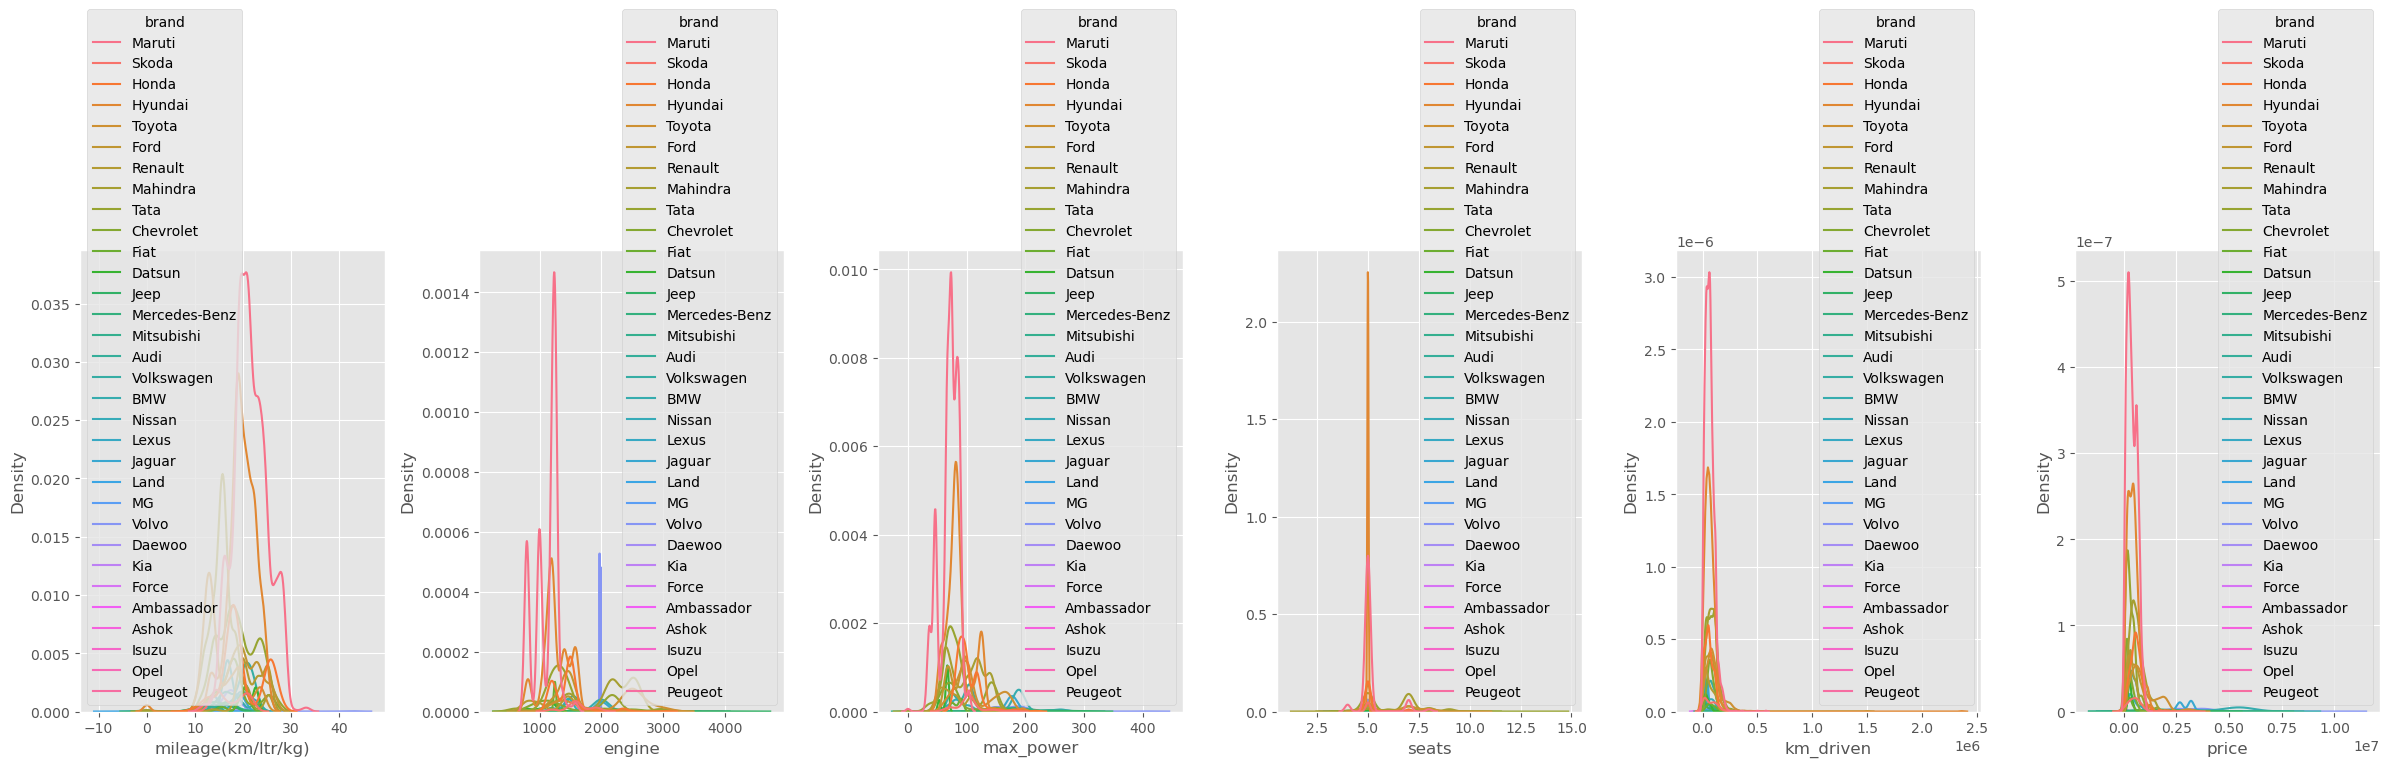

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18620\1814600842.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x=k, hue=i, ax=axes[j])


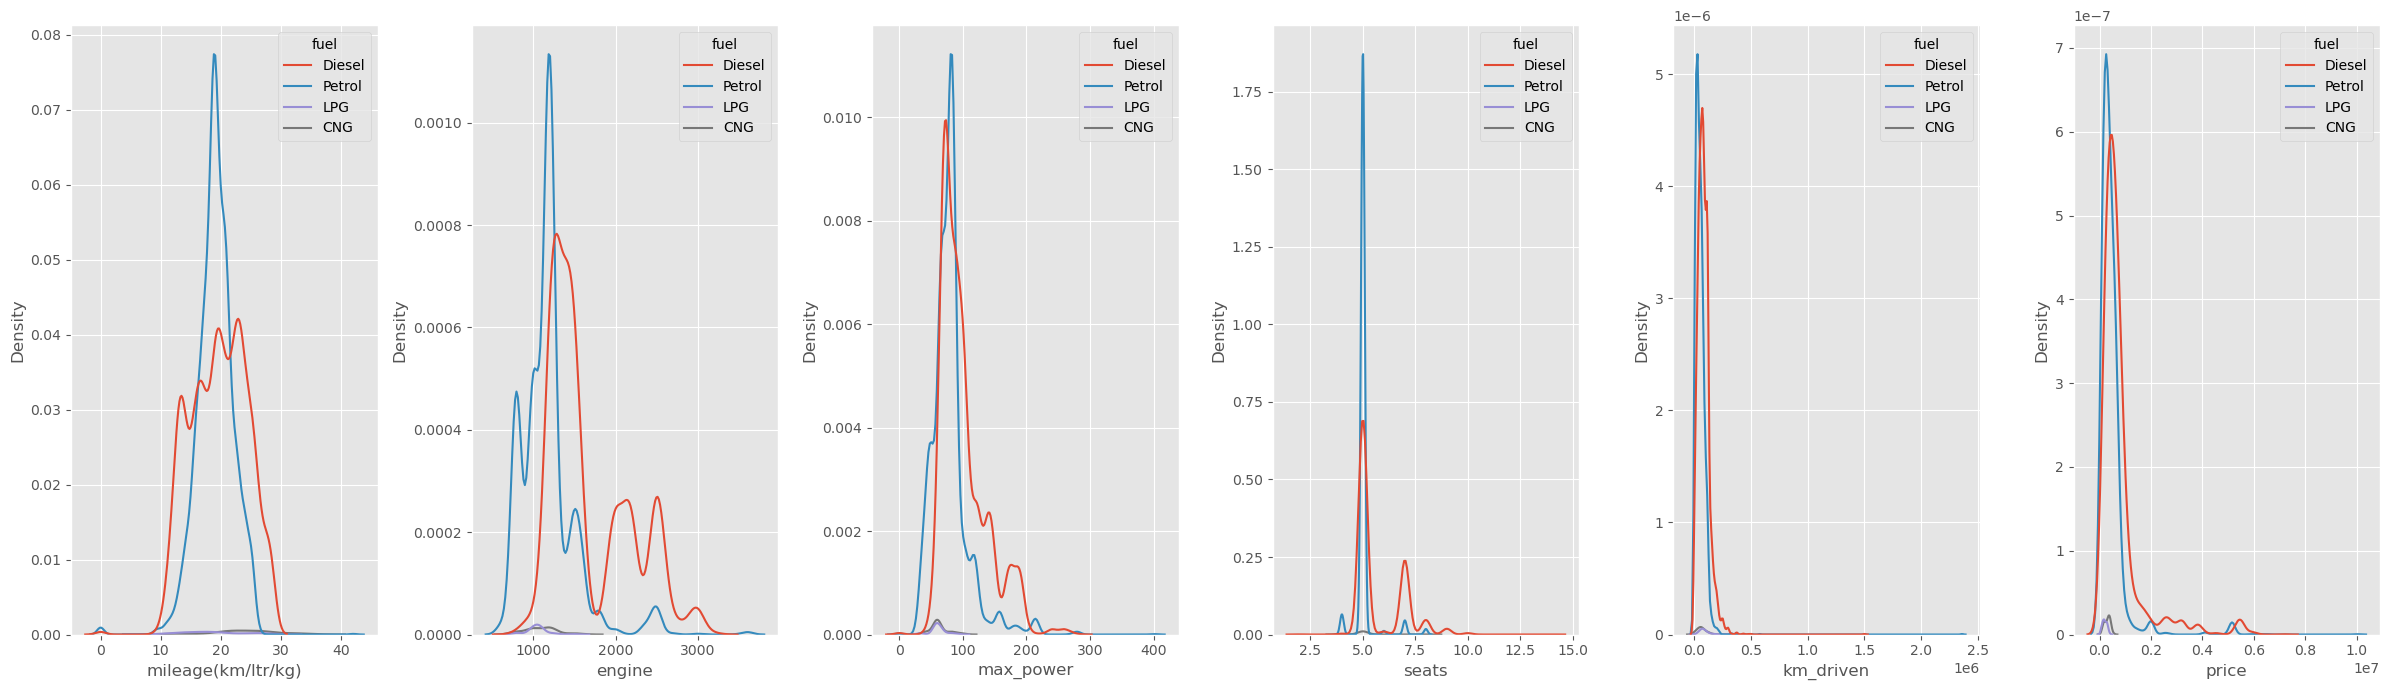

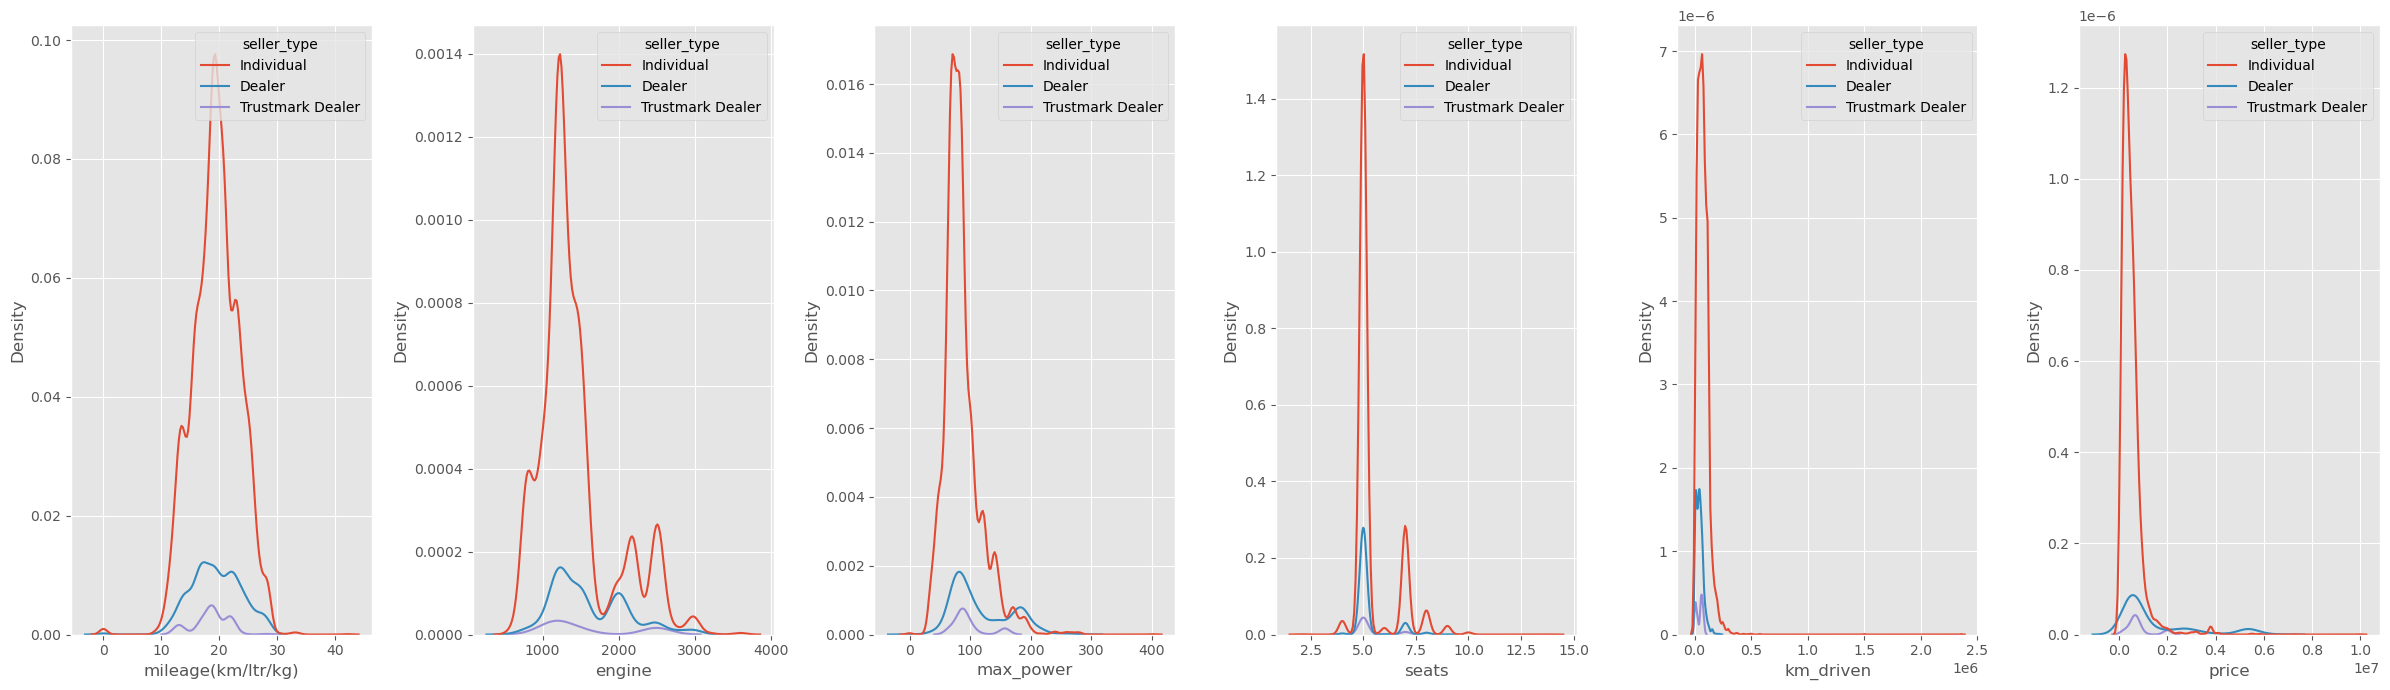

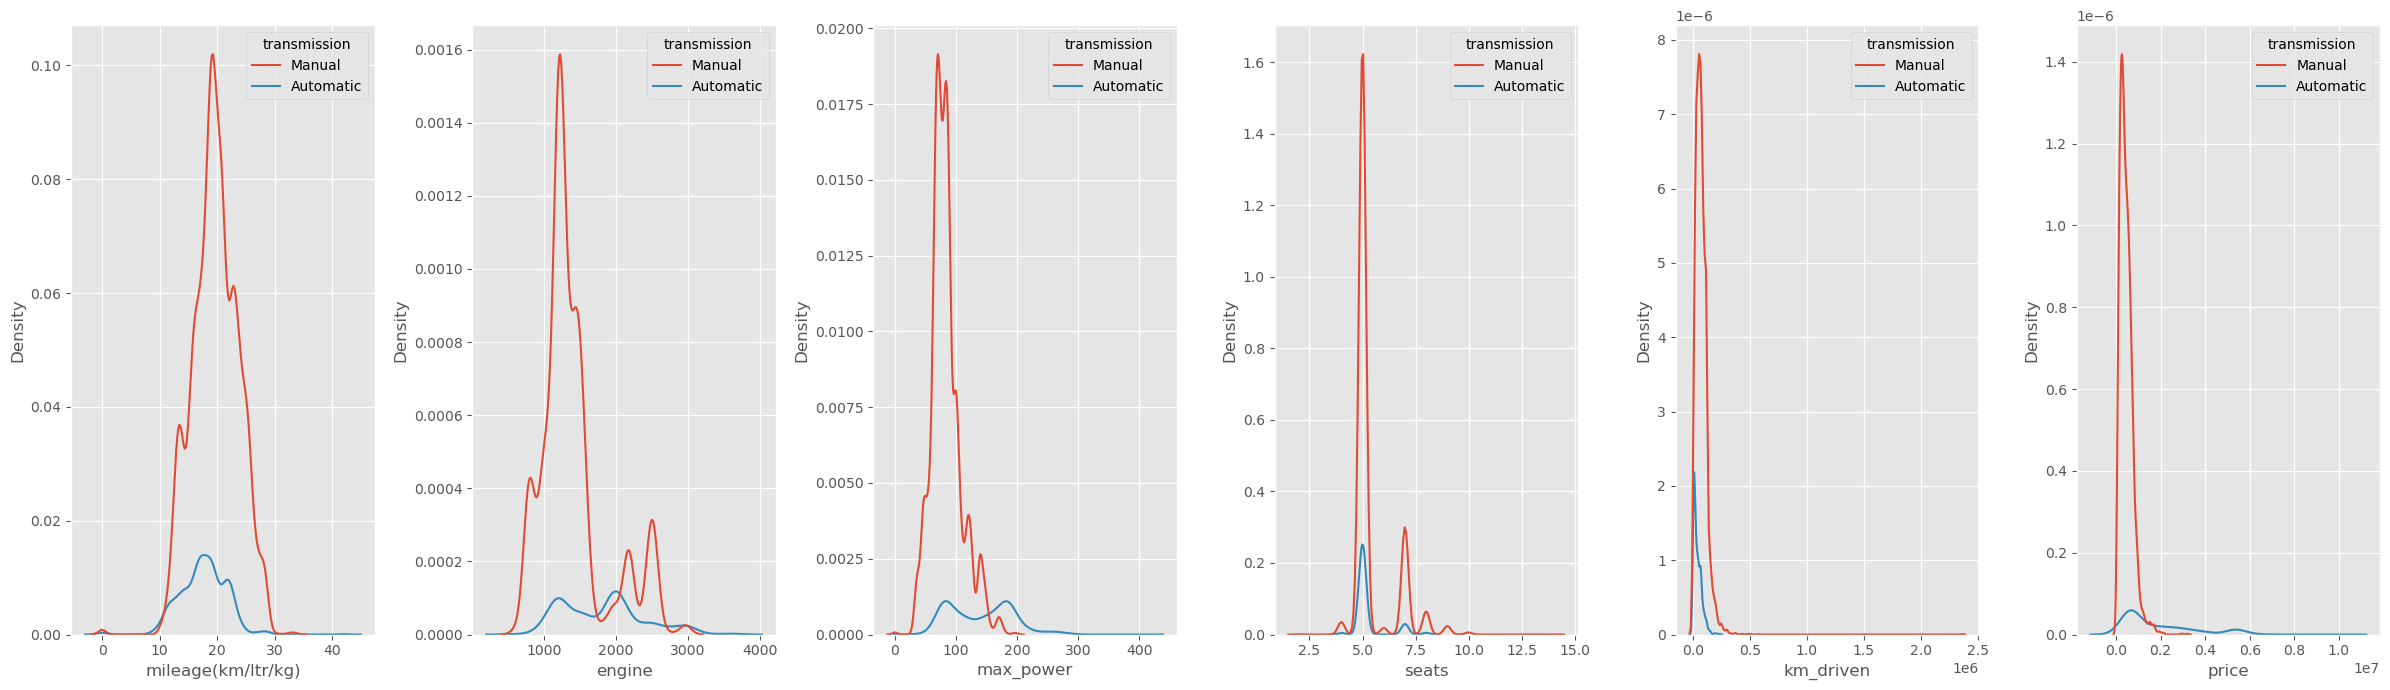

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18620\1814600842.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x=k, hue=i, ax=axes[j])


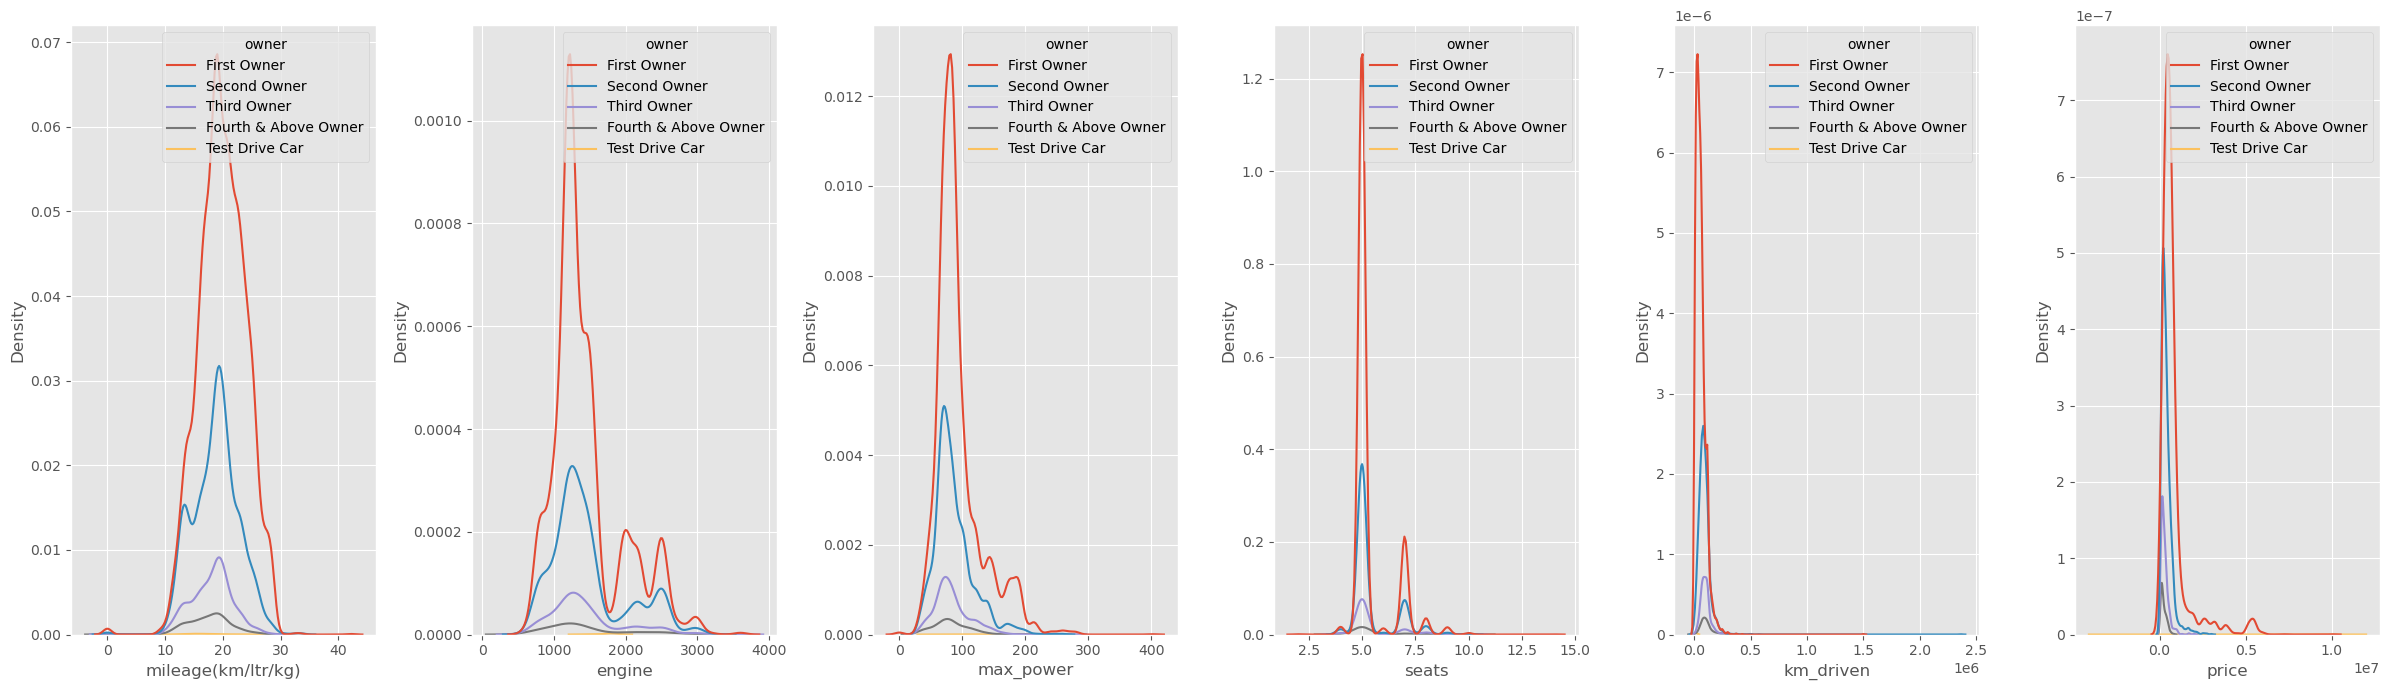

In [82]:
for i in categoricals:
    # Create a figure with 1 row and 6 columns of subplots
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 7))
    
    # Loop through the numeric variables and create a KDE plot for each
    for j, k in enumerate(numeric):
        # Plot the KDE for the current numeric variable, colored by the current categorical variable
        sns.kdeplot(df, x=k, hue=i, ax=axes[j])
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the figure
    plt.show()